In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
from PIL import Image
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
folder_path = "/content/drive/MyDrive/archive/"
No_Tumor_Img = os.listdir(folder_path + '/no/')
Tumor_Img = os.listdir(folder_path + '/yes/')

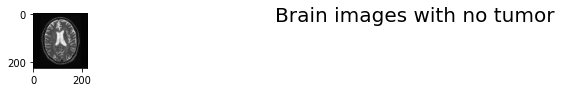

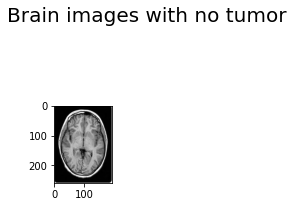

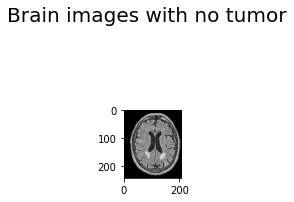

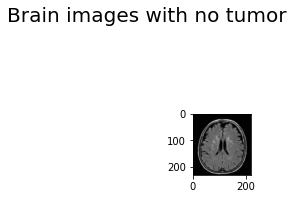

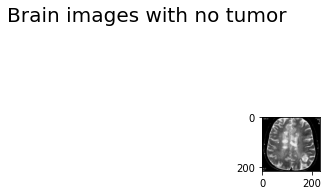

In [18]:
fig=plt.figure(figsize=(16,1))
for i in range(5):
  plt.subplot(1,5,i+1)
  img=cv2.imread('/content/drive/MyDrive/archive/no/'+No_Tumor_Img[i])
  plt.imshow(img)
  plt.suptitle("Brain images with no tumor",fontsize=20)
  plt.show()

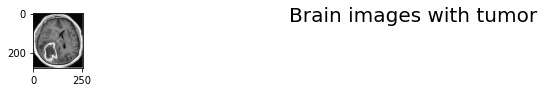

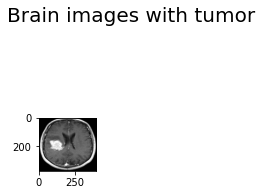

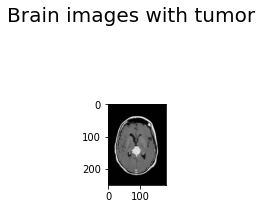

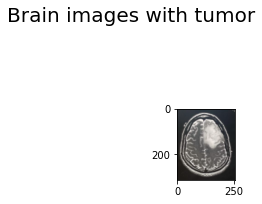

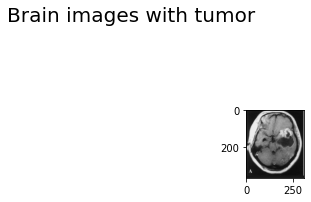

In [20]:
fig=plt.figure(figsize=(16,1))
for i in range(5):
  plt.subplot(1,5,i+1)
  img=cv2.imread('/content/drive/MyDrive/archive/yes/'+Tumor_Img[i])
  plt.imshow(img)
  plt.suptitle("Brain images with tumor",fontsize=20)
  plt.show()

In [21]:
Classes ={'no':0,'yes':1}

In [23]:
X = []
y = []
for i in Classes:
    path = '/content/drive/MyDrive/archive/'+i
    for j in os.listdir(path):
        img = cv2.imread(path+'/'+j, 0)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (240,240),interpolation=cv2.INTER_CUBIC)
        
        img = img / 255 
        X.append(img)
        y.append(Classes[i])



In [24]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((261, 240, 240), (261,))

In [25]:
Class_series=pd.Series(y)
lis=["No Tumor","Tumor"]
Tumor_or_not = Class_series.value_counts().tolist()
values = [Tumor_or_not[0], Tumor_or_not[1]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="percentage between Tumor & No Tumor")
fig.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

In [27]:
X_train.shape

(208, 240, 240)

In [28]:
X_train = X_train.reshape(-1, 240, 240, 1)
X_test = X_test.reshape(-1, 240, 240, 1)

In [29]:
X_train.shape

(208, 240, 240, 1)

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(240,240,1)),
    tf.keras.layers.Conv2D(32,(4,4),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                              padding='valid'),
    tf.keras.layers.Conv2D(32,(4,4),activation='relu'),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 235, 235, 32)      32800     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 117, 117, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 114, 114, 32)      16416     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                    

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
7/7 [==============================] - 12s 426ms/step - loss: 0.6394 - accuracy: 0.6442 - val_loss: 0.5889 - val_accuracy: 0.6604
Epoch 2/10
7/7 [==============================] - 1s 162ms/step - loss: 0.5644 - accuracy: 0.6971 - val_loss: 0.5005 - val_accuracy: 0.7358
Epoch 3/10
7/7 [==============================] - 1s 164ms/step - loss: 0.5126 - accuracy: 0.7837 - val_loss: 0.5806 - val_accuracy: 0.6226
Epoch 4/10
7/7 [==============================] - 1s 162ms/step - loss: 0.4853 - accuracy: 0.7885 - val_loss: 0.4796 - val_accuracy: 0.7925
Epoch 5/10
7/7 [==============================] - 1s 163ms/step - loss: 0.3995 - accuracy: 0.8365 - val_loss: 0.5482 - val_accuracy: 0.7170
Epoch 6/10
7/7 [==============================] - 1s 163ms/step - loss: 0.4268 - accuracy: 0.7981 - val_loss: 0.5125 - val_accuracy: 0.7547
Epoch 7/10
7/7 [==============================] - 1s 163ms/step - loss: 0.3400 - accuracy: 0.8413 - val_loss: 0.5009 - val_accuracy: 0.7547
Epoch 8/10
7/7 [===

In [33]:
history = model.history.history
model_loss=pd.DataFrame(model.history.history)

In [34]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
   
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()


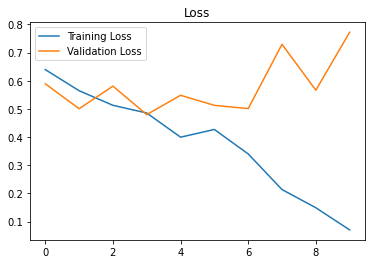

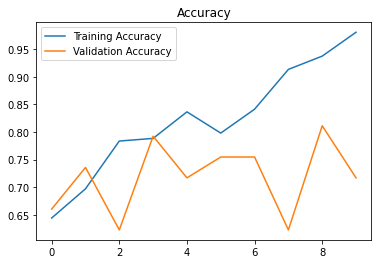

In [35]:
plot_metrics(history)

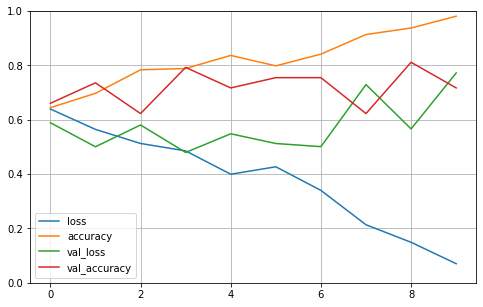

In [36]:
model_loss.plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
X = X.reshape(-1, 240, 240, 1)

In [38]:
Model_evaluation = model.evaluate(X, y)
print(f"Loss: {Model_evaluation[0]*100:.2f} %\nAccuracy: {Model_evaluation[1]:.4f} %")

9/9 [==============================] - 1s 79ms/step - loss: 0.2230 - accuracy: 0.9119
Loss: 22.30 %
Accuracy: 0.9119 %


In [39]:
y_predicted_tf =model.predict(X_test).reshape(-1)
y_predicted_tf = [1 if y>=0.5 else 0 for y in y_predicted_tf] 
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted_tf})
df.head(8)

2/2 [==============================] - 0s 64ms/step


,Y_test,Y_predicted
0,1,1
1,1,1
2,0,1
3,1,1
4,0,1
5,0,0
6,1,0
7,1,1


In [40]:
print(classification_report(y_predicted_tf,y_test))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65        25
           1       0.69      0.86      0.76        28

    accuracy                           0.72        53
   macro avg       0.73      0.71      0.71        53
weighted avg       0.73      0.72      0.71        53

